In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Crimes by category analysis

Unit: Per hundred thousand inhabitants

In [15]:
crimes_df = pd.read_csv('../processed_data/crimes_crime_by_category.csv')
crimes_df['geo'] = crimes_df['geo'].replace({'Northern Ireland (UK) (NUTS 2021)': 'Northern Ireland'})
crimes_df['geo'] = crimes_df['geo'].replace({'Scotland (NUTS 2021)': 'Scotland'})
crimes_df = crimes_df[~crimes_df['geo'].isin(['Northern Ireland', 'Scotland', 'England and Wales', 'Kosovo*', 'Bosnia and Herzegovina'])]


In [16]:
pivot_df = crimes_df.pivot_table(
    index='year',
    columns='geo',
    values='Crimes num',
    aggfunc="sum",
    fill_value=0
)
sorted_columns = pivot_df.mean().sort_values(ascending=True).index
pivot = pivot_df.loc[:, sorted_columns]

In [17]:
fig = px.imshow(
        pivot,
        labels=dict(x="Country", t="Year", color="Total Crimes per 100,000 Population"),
        x=pivot.columns,
        y=pivot.index,
        title="Total Crimes per Country per Year (sum of all categories)",
        color_continuous_scale="YlOrRd",
        aspect="auto",
        width=1200,
        height=600,
        text_auto=True
    )
fig.show()


In [18]:
liberal = ["France", "Italy", "Germany", "Sweden", "Spain", "Austria"]
conservs = ["Poland", "Bulgaria", "Romania", "Hungary",  "Greece"]
selected = liberal + conservs


In [19]:
pivot_df = crimes_df[crimes_df['geo'].isin(liberal)].pivot_table(
    index='year',
    columns='geo',
    values='Crimes num',
    aggfunc="sum",
    fill_value=0
)
sorted_columns = pivot_df.mean().sort_values(ascending=True).index
pivot = pivot_df.loc[:, sorted_columns]

fig = px.imshow(
        pivot,
        labels=dict(x="Country", t="Year", color="Total Crimes per 100,000 Population"),
        x=pivot.columns,
        y=pivot.index,
        title="Total Crimes per Year (sum of all categories) in selected liberal contries",
        color_continuous_scale="YlOrRd",
        aspect="auto",
        width=1200,
        height=600,
        text_auto=True
    )
fig.show()

In [20]:
pivot_df = crimes_df[crimes_df['geo'].isin(conservs)].pivot_table(
    index='year',
    columns='geo',
    values='Crimes num',
    aggfunc="sum",
    fill_value=0
)
sorted_columns = pivot_df.mean().sort_values(ascending=True).index
pivot = pivot_df.loc[:, sorted_columns]

df_long = pivot.reset_index().melt(id_vars='year', var_name='Country', value_name='Total Crimes')

fig = px.line(
    df_long,
    x='year',
    y='Total Crimes',
    color='Country',
    title="Total Crimes per Year (sum of all categories) in selected conservative countries",
    labels={
        'year': 'Year',
        'Total Crimes': 'Total Crimes per 100,000 Population',
        'Country': 'Country'
    },
    width=1200,
    height=600,
    markers=True
)

fig.show()


In [21]:
pivot_df = crimes_df[crimes_df['geo'].isin(selected)].pivot_table(
    index='year',
    columns='geo',
    values='Crimes num',
    aggfunc="sum",
    fill_value=0
)
sorted_columns = pivot_df.mean().sort_values(ascending=True).index
pivot = pivot_df.loc[:, sorted_columns]

fig = px.imshow(
        pivot,
        labels=dict(x="Country", t="Year", color="Total Crimes per 100,000 Population"),
        x=pivot.columns,
        y=pivot.index,
        title="Total Crimes per Year (sum of all categories) in selected countries",
        color_continuous_scale="YlOrRd",
        aspect="auto",
        width=1200,
        height=600,
        text_auto=True
    )
fig.show()

In [22]:
crimes_df['Group'] = crimes_df['geo'].apply(
    lambda x: 'Liberal' if x in liberal else ('Conservative' if x in conservs else 'Other')
)

grouped = crimes_df[crimes_df['Group'] != 'Other'].groupby(['year', 'Group'])['Crimes num'].mean().reset_index()

fig = px.line(
    grouped,
    x='year',
    y='Crimes num',
    color='Group',
    title='Average Total Crimes per Year by Political Group',
    labels={
        'year': 'Year',
        'Total Crimes': 'Avg Total Crimes per 100,000 Population',
        'Group': 'Political Group'
    },
    width=1000,
    height=500,
    markers=True
)
fig.show()


In [23]:
fig = px.scatter(
    grouped,
    x='year',
    y='Crimes num',
    color='Group',
    trendline='ols',
    title='Trend in Average Crimes by Group',
    labels={'Total Crimes': 'Avg Crimes per 100k', 'year': 'Year'},
    height=500,
    width=1000
)
fig.show()


In [24]:
# without Sweden - it has a very high number of crimes
crimes_df['Group'] = crimes_df['geo'].apply(
    lambda x: 'Liberal' if x in liberal else ('Conservative' if x in conservs else 'Other')
)
filtered = crimes_df[(crimes_df['Group'] != 'Other') & (crimes_df['geo'] != 'Sweden')]

grouped = filtered.groupby(['year', 'Group'])['Crimes num'].mean().reset_index()


fig = px.line(
    grouped,
    x='year',
    y='Crimes num',
    color='Group',
    title='Average Total Crimes per Year by Political Group',
    labels={
        'year': 'Year',
        'Total Crimes': 'Avg Total Crimes per 100,000 Population',
        'Group': 'Political Group'
    },
    width=1000,
    height=500,
    markers=True
)
fig.show()

fig = px.scatter(
    grouped,
    x='year',
    y='Crimes num',
    color='Group',
    trendline='ols',
    title='Trend in Average Crimes by Group',
    labels={'Total Crimes': 'Avg Crimes per 100k', 'year': 'Year'},
    height=500,
    width=1000
)
fig.show()

Ilość popełnianych przestępstw w krajach liberalych jest znacznie wyższa niż w krajach konserwatywnych na przestrzesni wszystkich badanych lat

### Analiza kateorii przestępstw dla wszystkich badanych krajów

In [25]:
for country in selected:
    pivot_df = crimes_df[crimes_df['geo'] == country].pivot_table(
        index='year',
        columns='iccs',
        values='Crimes num',
        aggfunc="sum"
    )
    sorted_columns = pivot_df.mean().sort_values(ascending=True).index
    pivot = pivot_df.loc[:, sorted_columns]

    fig = px.imshow(
            pivot,
            labels=dict(x="Country", t="Year", color="Total Crimes per 100,000 Population"),
            x=pivot.columns,
            y=pivot.index,
            title=f"Total Crimes per Year in {country}",
            color_continuous_scale="YlOrRd",
            aspect="auto",
            width=1200,
            height=600,
            text_auto=True
        )
    fig.show()

W ogólności we wszystkich krajach rozkład wygląda podobnie.

Zdecydowano się wybrać niektóre kategorie i je przeksplorować.

In [26]:
selected_cat = [
    'Theft', 'Theft of a motorized vehicle or parts thereof',
    'Unlawful acts involving controlled drugs or precursors',
    'Sexual assault', 'Corruption', 'Sexual violence', 'Rape',
    'Sexual exploitation', 'Fraud', 'Burglary', 'Robbery'
]

for cat in selected_cat:
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Conservative Countries", "Liberal Countries"),
        shared_yaxes=True
    )
    
    df_conservative = crimes_df[
        (crimes_df['geo'].isin(conservs)) & (crimes_df['iccs'] == cat)
    ]
    
    for country in conservs:
        country_df = df_conservative[df_conservative['geo'] == country].sort_values('year')
        fig.add_trace(
            go.Scatter(
                x=country_df['year'],
                y=country_df['Crimes num'],
                mode='lines+markers',
                name=country
            ),
            row=1, col=1
        )
    

    df_liberal = crimes_df[
        (crimes_df['geo'].isin(liberal)) & (crimes_df['iccs'] == cat)
    ]
    
    for country in liberal:
        country_df = df_liberal[df_liberal['geo'] == country].sort_values('year')
        fig.add_trace(
            go.Scatter(
                x=country_df['year'],
                y=country_df['Crimes num'],
                mode='lines+markers',
                name=country,
                showlegend=True  
            ),
            row=1, col=2
        )
    
    fig.update_layout(
        title_text=f"{cat}: Total crimes reported",
        width=1200,
        height=500,
        legend_title="Country"
    )
    
    fig.show()


* Wszystkich badanych kategorii przestępstw jest więcej w krajach otwartych na migrantów.
* W ogólności przestępstwa związane z kradzieżami wykazują trend malejący lub pozostają na podobnym poziomie.
* Liczba przestępstw związanych z seksualnością maleje/pozostaje na podobnym poziomie w krajach zamkniętych na migracje (wyjątek: Polska), a rośnie w krajach otwartych.
* Szwecja jest ekstremalnym przypadkiem, jeżeli chodzi o liczbę przestępstw - zarówno całościowo, jak i zwłaszcza tych związanych z narkotykami i przemocą seksualną

### Korelacje z liczbą migrantów

In [27]:
crimes_df['iccs'].unique()

array(['Intentional homicide', 'Attempted intentional homicide',
       'Serious assault', 'Kidnapping', 'Sexual violence', 'Rape',
       'Sexual assault', 'Sexual exploitation', 'Child pornography',
       'Robbery', 'Burglary', 'Burglary of private residential premises',
       'Theft', 'Theft of a motorized vehicle or parts thereof',
       'Unlawful acts involving controlled drugs or precursors', 'Fraud',
       'Corruption', 'Bribery', 'Money laundering',
       'Acts against computer systems',
       'Participation in an organized criminal group'], dtype=object)

In [28]:
crime_groups = {
    "Sexual crimes": [
        'Sexual violence', 'Rape', 'Sexual assault', 'Sexual exploitation', 'Child pornography'
    ],
    "Offenses against the person": [
        'Intentional homicide', 'Attempted intentional homicide', 'Serious assault', 'Kidnapping'
    ],
    "Property crimes": [
        'Burglary', 'Burglary of private residential premises', 'Theft', 'Theft of a motorized vehicle or parts thereof', 'Robbery'
    ],
    "Drug-related crimes": [
        'Unlawful acts involving controlled drugs or precursors'
    ],
    "Economic crimes": [
        'Fraud', 'Corruption', 'Bribery', 'Money laundering'
    ],
    "Cyber crimes": [
        'Acts against computer systems'
    ],
    "Organized crime": [
        'Participation in an organized criminal group'
    ]
}

In [29]:
def assign_group(category):
    for group, cats in crime_groups.items():
        if category in cats:
            return group
    return 'Other'  

crimes_df['crime_group'] = crimes_df['iccs'].apply(assign_group)

In [30]:
migr = pd.read_csv('../processed_data/immigration_by_citizenship_combined_data.csv')

In [31]:
merged = pd.merge(crimes_df, migr, on=['geo', 'year'])

In [32]:
merged.head()

,iccs,geo,year,Crimes num,Group,crime_group,EU,Ukraine,national,non_EU,foreigners,foreigners_pop_share,non_EU_pop_share,ukraine_pop_share,ukraine_for_share,non_EU_for_share,iso_a3
0,Intentional homicide,Austria,2008,0.70,Liberal,Offenses against the person,39541.0,604.0,8636.0,90810.0,130351.0,1.568984,1.093044,0.007270,0.463364,69.665749,AUT
1,Intentional homicide,Austria,2009,0.61,Liberal,Offenses against the person,0.0,0.0,8988.0,60233.0,60233.0,0.722651,0.722651,0.000000,0.000000,100.000000,AUT
2,Intentional homicide,Austria,2010,0.73,Liberal,Offenses against the person,0.0,0.0,8817.0,62610.0,62610.0,0.749673,0.749673,0.000000,0.000000,100.000000,AUT
3,Intentional homicide,Austria,2011,0.96,Liberal,Offenses against the person,46842.0,680.0,8082.0,101928.0,148770.0,1.776323,1.217027,0.008119,0.457081,68.513813,AUT
4,Intentional homicide,Austria,2012,1.05,Liberal,Offenses against the person,52128.0,767.0,8272.0,114725.0,166853.0,1.984427,1.364455,0.009122,0.459686,68.758128,AUT


In [33]:
sum_df = merged.groupby(['geo', 'year', 'foreigners_pop_share']).agg({
    'Crimes num': 'sum'
}).reset_index()


sum_df.head()

,geo,year,foreigners_pop_share,Crimes num
0,Austria,2008,1.568984,3896.74
1,Austria,2009,0.722651,3906.74
2,Austria,2010,0.749673,3308.21
3,Austria,2011,1.776323,3197.13
4,Austria,2012,1.984427,3212.19


In [34]:
corr =  sum_df[['foreigners_pop_share', 'Crimes num']].corr()

In [35]:
print(corr)

                      foreigners_pop_share  Crimes num
foreigners_pop_share              1.000000    0.271673
Crimes num                        0.271673    1.000000


In [36]:
sum_df['foreigners_lagged'] = sum_df.groupby('geo')['foreigners_pop_share'].shift(1)

lagged_df = sum_df.dropna(subset=['foreigners_lagged'])

corr_lagged = lagged_df[['foreigners_lagged', 'Crimes num']].corr()
print(corr_lagged)


                   foreigners_lagged  Crimes num
foreigners_lagged           1.000000    0.338899
Crimes num                  0.338899    1.000000


In [37]:
sum_df['foreigners_lagged'] = sum_df.groupby('geo')['foreigners_pop_share'].shift(2)

lagged_df = sum_df.dropna(subset=['foreigners_lagged'])

corr_lagged = lagged_df[['foreigners_lagged', 'Crimes num']].corr()
print(corr_lagged)


                   foreigners_lagged  Crimes num
foreigners_lagged           1.000000    0.353411
Crimes num                  0.353411    1.000000


In [49]:
sum_df['foreigners_lagged'] = sum_df.groupby('geo')['foreigners_pop_share'].shift(5)

lagged_df = sum_df.dropna(subset=['foreigners_lagged'])

corr_lagged = lagged_df[['foreigners_lagged', 'Crimes num']].corr()
print(corr_lagged)

                   foreigners_lagged  Crimes num
foreigners_lagged            1.00000     0.41395
Crimes num                   0.41395     1.00000


In [42]:
categories = merged['iccs'].unique()
shifts = [0, 1, 2, 3]  

correlations = {}

for shift in shifts:
    print(f"\n=== Shift: {shift} ===")
    correlations = {}
    for cat in categories:
        cat_data = merged[merged['iccs'] == cat].copy()
        
        cat_data = cat_data.sort_values(by=['geo', 'year'])

        cat_data['foreigners_pop_share_shifted'] = cat_data.groupby('geo')['foreigners_pop_share'].shift(shift)

        cat_data = cat_data.dropna(subset=['foreigners_pop_share_shifted', 'Crimes num'])
        
        
        if len(cat_data) < 2:
            correlations[cat] = None 
            continue
        
        corr = cat_data['foreigners_pop_share_shifted'].corr(cat_data['Crimes num'])
        correlations[cat] = corr

    correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
    correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
    print(correlation_df)


=== Shift: 0 ===
                                                    Correlation
Attempted intentional homicide                         0.416402
Unlawful acts involving controlled drugs or pre...     0.403907
Kidnapping                                             0.358268
Acts against computer systems                          0.342444
Sexual violence                                        0.325651
Sexual assault                                         0.298746
Rape                                                   0.274949
Money laundering                                       0.251309
Participation in an organized criminal group           0.228985
Sexual exploitation                                    0.219282
Burglary of private residential premises               0.210133
Theft                                                  0.165112
Burglary                                               0.145292
Child pornography                                      0.106259
Serious assault       

In [43]:
groups = merged['crime_group'].unique()
shifts = [0, 1, 2, 3]  

for shift in shifts:
    print(f"\n=== Shift: {shift} ===")
    correlations = {}

    for cat in groups:
        cat_data = merged[merged['crime_group'] == cat].copy()
        
        cat_data = cat_data.sort_values(by=['geo', 'year'])

        cat_data['foreigners_pop_share_shifted'] = cat_data.groupby('geo')['foreigners_pop_share'].shift(shift)

        cat_data = cat_data.dropna(subset=['foreigners_pop_share_shifted', 'Crimes num'])

        if len(cat_data) < 2:
            correlations[cat] = None
            continue

        corr = cat_data['foreigners_pop_share_shifted'].corr(cat_data['Crimes num'])
        correlations[cat] = corr

    correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
    correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
    print(correlation_df)



=== Shift: 0 ===
                             Correlation
Drug-related crimes             0.403907
Cyber crimes                    0.342444
Sexual crimes                   0.259605
Organized crime                 0.228985
Property crimes                 0.081715
Economic crimes                 0.059227
Offenses against the person     0.054216

=== Shift: 1 ===
                             Correlation
Drug-related crimes             0.467584
Cyber crimes                    0.364895
Organized crime                 0.285412
Sexual crimes                   0.254351
Property crimes                 0.091288
Offenses against the person     0.060284
Economic crimes                 0.036942

=== Shift: 2 ===
                             Correlation
Drug-related crimes             0.472500
Cyber crimes                    0.387062
Organized crime                 0.268684
Sexual crimes                   0.257925
Property crimes                 0.096469
Offenses against the person     0.066015
Eco

In [116]:
threshold = 0.5

results_totals = []
results_categories = []

for country in selected:
    country_data = merged[merged['geo'] == country]
    
    # all categories
    summed = country_data.groupby('year').agg({
        'Crimes num': 'sum',
        'foreigners_pop_share': 'mean'
    }).reset_index()
    
    if not summed['foreigners_pop_share'].isnull().all() and len(summed) >= 2:
        corr = summed['foreigners_pop_share'].corr(summed['Crimes num'])
        if abs(corr) >= threshold:
            results_totals.append({
                'Country': country,
                'Category': 'Total',
                'Correlation': corr
            })
    
    # in crime groups
    groups = country_data['crime_group'].unique()
    for group in groups:
        group_data = country_data[country_data['crime_group'] == group]
        group_summed = group_data.groupby('year').agg({
            'Crimes num': 'sum',
            'foreigners_pop_share': 'mean'
        }).reset_index()
        
        if not group_summed['foreigners_pop_share'].isnull().all() and len(group_summed) >= 2:
            corr_group = group_summed['foreigners_pop_share'].corr(group_summed['Crimes num'])
            if abs(corr_group) >= threshold:
                results_categories.append({
                    'Country': country,
                    'Category': group,
                    'Correlation': corr_group
                })

df_totals = pd.DataFrame(results_totals).sort_values(by='Correlation', key=lambda x: x.abs(), ascending=False)
df_categories = pd.DataFrame(results_categories).sort_values(by='Correlation', key=lambda x: x.abs(), ascending=False)

print("=== Correlations - sums all categories ===")
print(df_totals)

print("\n=== Correlations - individual crime groups ===")
print(df_categories)


=== Correlations - sums all categories ===
    Country Category  Correlation
3   Hungary    Total    -0.881461
1     Spain    Total     0.868804
0    France    Total     0.786628
2  Bulgaria    Total    -0.569719

=== Correlations - individual crime groups ===
     Country                     Category  Correlation
23   Romania                 Cyber crimes     0.970807
7      Spain                Sexual crimes     0.942987
11     Spain              Organized crime     0.874431
25   Hungary              Property crimes    -0.852309
27   Hungary              Economic crimes    -0.839638
19  Bulgaria  Offenses against the person     0.811868
26   Hungary          Drug-related crimes     0.799741
21   Romania                Sexual crimes     0.798171
24   Hungary  Offenses against the person    -0.797580
9      Spain              Economic crimes     0.796076
8      Spain          Drug-related crimes     0.764927
15   Austria                 Cyber crimes     0.762364
4      Italy            

In [117]:
def summarize_correlations(df, corr_col='Correlation'):
    total = len(df)
    positive = (df[corr_col] > 0).sum()
    negative = (df[corr_col] < 0).sum()
    mean_corr = df[corr_col].mean()
    median_corr = df[corr_col].median()
    
    top_pos = df.sort_values(by=corr_col, ascending=False).head(5)
    top_neg = df.sort_values(by=corr_col).head(5)
    
    print(f"Total correlations: {total}")
    print(f"Positive correlations: {positive}")
    print(f"Negative correlations: {negative}")
    print(f"Mean correlation: {mean_corr:.3f}")
    print(f"Median correlation: {median_corr:.3f}\n")
    
    print("Top 5 positive correlations:")
    print(top_pos)
    print("\nTop 5 negative correlations:")
    print(top_neg)

summarize_correlations(df_categories)


Total correlations: 31
Positive correlations: 23
Negative correlations: 8
Mean correlation: 0.347
Median correlation: 0.654

Top 5 positive correlations:
     Country                     Category  Correlation
23   Romania                 Cyber crimes     0.970807
7      Spain                Sexual crimes     0.942987
11     Spain              Organized crime     0.874431
19  Bulgaria  Offenses against the person     0.811868
26   Hungary          Drug-related crimes     0.799741

Top 5 negative correlations:
    Country                     Category  Correlation
25  Hungary              Property crimes    -0.852309
27  Hungary              Economic crimes    -0.839638
24  Hungary  Offenses against the person    -0.797580
4     Italy                Sexual crimes    -0.751277
30   Greece              Economic crimes    -0.708307


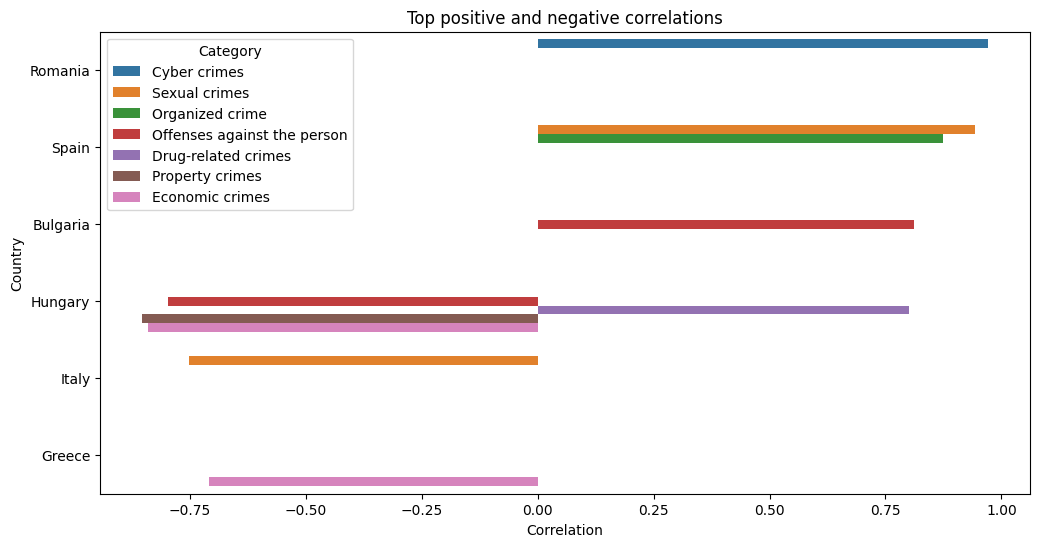

In [118]:
def plot_top_correlations(df, n=10):
    df_sorted = pd.concat([
        df.sort_values(by='Correlation', ascending=False).head(n),
        df.sort_values(by='Correlation').head(n)
    ])
    
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_sorted, x='Correlation', y='Country' if 'Country' in df.columns else 'Category', hue='Category' if 'Category' in df.columns else None)
    plt.title('Top positive and negative correlations')
    plt.show()

plot_top_correlations(df_categories, n=5)


In [119]:
def plot_time_series_plotly(merged, country, y_label, title, category=None):
    data = merged[merged['geo'] == country]
    if category:
        data = data[data['crime_group'] == category]
    
    grouped = data.groupby('year').agg({
        'Crimes num': 'sum',
        'foreigners_pop_share': 'mean'
    }).reset_index()
    
    fig = go.Figure()
    

    fig.add_trace(go.Scatter(
        x=grouped['year'], y=grouped['Crimes num'],
        mode='lines+markers',
        name='Crimes num',
        line=dict(color='red'),
        yaxis='y1'
    ))
    

    fig.add_trace(go.Scatter(
        x=grouped['year'], y=grouped['foreigners_pop_share'],
        mode='lines+markers',
        name=y_label,
        line=dict(color='blue'),
        yaxis='y2'
    ))
    
    fig.update_layout(
        title=f'{title}<br>Country: {country}' + (f', Category: {category}' if category else ''),
        xaxis_title='Year',
        yaxis=dict(
            title='Crimes num',
            tickfont=dict(color='red'),
            side='left'
        ),
        yaxis2=dict(
            title=y_label,
            tickfont=dict(color='blue'),
            overlaying='y',
            side='right'
        ),
        legend=dict(x=0.1, y=1.1, orientation='h')
    )
    
    fig.show()

In [120]:
plot_time_series_plotly(merged, 'Romania', 'Migrants pop share(%)', 'Trend Crimes num & Migrants pop share',  'Cyber crimes')

In [104]:
plot_time_series_plotly(merged, 'Germany', 'Migrants pop share(%)', 'Trend Crimes num & Migrants pop share', 'Sexual crimes')
plot_time_series_plotly(merged, 'France', 'Migrants pop share(%)', 'Trend Crimes num & Migrants pop share', 'Sexual crimes')
plot_time_series_plotly(merged, 'Austria', 'Migrants pop share(%)', 'Trend Crimes num & Migrants pop share', 'Sexual crimes')
plot_time_series_plotly(merged, 'Hungary', 'Migrants pop share(%)', 'Trend Crimes num & Migrants pop share', 'Sexual crimes')
plot_time_series_plotly(merged, 'Netherlands', 'Migrants pop share(%)', 'Trend Crimes num & Migrants pop share', 'Sexual crimes')
plot_time_series_plotly(merged, 'Spain', 'Migrants pop share(%)', 'Trend Crimes num & Migrants pop share', 'Sexual crimes')

In [121]:
plot_time_series_plotly(merged, 'Poland', 'Migrants pop share(%)', 'Trend Crimes num & Migrants pop share', 'Offenses against the person')

In [122]:
plot_time_series_plotly(merged, 'Sweden', 'Migrants pop share(%)', 'Trend Crimes num & Migrants pop share', 'Drug-related crimes')

In [125]:
def plot_group_trend_plotly(merged, liberal, conservs, y_label, title, category=None):
    merged = merged.copy()

    data = merged[merged['Group'] != 'Other']
    
    if category:
        data = data[data['crime_group'] == category]
    
    grouped = data.groupby(['year', 'Group']).agg({
        'Crimes num': 'mean',
        'foreigners_pop_share': 'mean'
    }).reset_index()
    
    fig = go.Figure()
    
    colors = {'Liberal': 'red', 'Conservative': 'green'}
    
    for group in ['Liberal', 'Conservative']:
        group_data = grouped[grouped['Group'] == group]

        fig.add_trace(go.Scatter(
            x=group_data['year'], y=group_data['Crimes num'],
            mode='lines+markers',
            name=f'{group} - Crimes num',
            line=dict(color=colors[group]),
            yaxis='y1'
        ))

        fig.add_trace(go.Scatter(
            x=group_data['year'], y=group_data['foreigners_pop_share'],
            mode='lines+markers',
            name=f'{group} - {y_label}',
            line=dict(color=colors[group], dash='dot'),
            yaxis='y2'
        ))

    fig.update_layout(
        title=f'{title}' + (f' — Category: {category}' if category else ''),
        xaxis_title='Year',
        yaxis=dict(
            title='Avg Crimes per 100k',
            tickfont=dict(color='red'),
            side='left'
        ),
        yaxis2=dict(
            title=y_label,
            tickfont=dict(color='blue'),
            overlaying='y',
            side='right'
        ),
        legend=dict(x=0.05, y=1.12, orientation='h'),
        width=1000,
        height=600
    )
    
    fig.show()


In [126]:
plot_group_trend_plotly(merged=merged, liberal=liberal, conservs=conservs, title='Trends in Crimes and Migrants Share by Political Group', y_label='Migrants pop share (%)')

In [127]:
plot_group_trend_plotly(merged=merged, liberal=liberal, conservs=conservs, title='Trends in Crimes and Migrants Share by Political Group', y_label='Migrants pop share (%)', category='Sexual crimes')

In [128]:
plot_group_trend_plotly(merged=merged, liberal=liberal, conservs=conservs, title='Trends in Crimes and Migrants Share by Political Group', y_label='Migrants pop share (%)',  category='Drug-related crimes')

In [129]:
plot_group_trend_plotly(merged=merged, liberal=liberal, conservs=conservs, title='Trends in Crimes and Migrants Share by Political Group', y_label='Migrants pop share (%)',  category='Offenses against the person')

### Klasteryzacje

In [94]:
filtered = merged[merged['geo'] != 'Luxembourg']

features_df = filtered.groupby('geo').agg({
    'Crimes num': 'mean',
    'foreigners_pop_share': 'mean'
}).reset_index()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df[['Crimes num', 'foreigners_pop_share']])

kmeans = KMeans(n_clusters=4, random_state=0)
features_df['Cluster'] = kmeans.fit_predict(scaled_features)

fig = px.scatter(
    features_df,
    x='Crimes num',
    y='foreigners_pop_share',
    color=features_df['Cluster'].astype(str),
    hover_name='geo',
    title='K-means Clustering of Countries by Crime Rate and Migrants Share',
    labels={'Crimes num': 'Avg Crimes per 100k', 'foreigners_pop_share': 'Migrants %'},
    width=800,
    height=600,
    text='geo'
)
fig.update_traces(textposition='top center')
fig.show()


In [75]:
# without potential outliers
filtered = merged[~merged['geo'].isin(['Denmark', 'Luxembourg', 'Sweden'])]

features_df = filtered.groupby('geo').agg({
    'Crimes num': 'mean',
    'foreigners_pop_share': 'mean'
}).reset_index()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df[['Crimes num', 'foreigners_pop_share']])

kmeans = KMeans(n_clusters=3, random_state=0)
features_df['Cluster'] = kmeans.fit_predict(scaled_features)

fig = px.scatter(
    features_df,
    x='Crimes num',
    y='foreigners_pop_share',
    color=features_df['Cluster'].astype(str),
    hover_name='geo',
    title='K-means Clustering of Countries by Crime Rate and Migrants Share',
    labels={'Crimes num': 'Avg Crimes per 100k', 'foreigners_pop_share': 'Migrants %'},
    text='geo',
    width=800,
    height=600
)
fig.update_traces(textposition='top center')
fig.show()



In [83]:
# without potential outliers
filtered = merged[(merged['geo'].isin(selected)) & (merged['geo'] != 'Sweden')]

features_df = filtered.groupby('geo').agg({
    'Crimes num': 'mean',
    'foreigners_pop_share': 'mean'
}).reset_index()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df[['Crimes num', 'foreigners_pop_share']])

kmeans = KMeans(n_clusters=2, random_state=42)
features_df['Cluster'] = kmeans.fit_predict(scaled_features)

fig = px.scatter(
    features_df,
    x='Crimes num',
    y='foreigners_pop_share',
    color=features_df['Cluster'].astype(str),
    hover_name='geo',
    title='K-means Clustering of Countries by Crime Rate and Migrants Share',
    labels={'Crimes num': 'Avg Crimes per 100k', 'foreigners_pop_share': 'Migrants %'},
    text='geo',
    width=800,
    height=600
)
fig.update_traces(textposition='top center')
fig.show()



### Korelacje z odsetkiem cudzoziemców w populacji

In [130]:
migr = pd.read_csv('../processed_data/population_by_citizenship_combined_data.csv')


merged = pd.merge(crimes_df, migr, on=['geo', 'year'])

In [131]:
merged.head()

,iccs,geo,year,Crimes num,Group,crime_group,EU,from_Ukraine,national,non_EU,foreigners,iso_a3,foreigners_pop_share,non_EU_pop_share,ukraine_pop_share,ukraine_for_share,non_EU_for_share
0,Intentional homicide,Austria,2015,0.49,Liberal,Offenses against the person,560680.0,8582.0,7438848.0,1715038.0,2275718.0,AUT,23.425833,17.654294,0.088342,0.377112,75.362501
1,Intentional homicide,Austria,2016,0.56,Liberal,Offenses against the person,606439.0,9669.0,7432797.0,1909181.0,2515620.0,AUT,25.286636,19.190802,0.097191,0.384359,75.893060
2,Intentional homicide,Austria,2017,0.70,Liberal,Offenses against the person,645156.0,10199.0,7430935.0,2016039.0,2661195.0,AUT,26.369012,19.976348,0.101059,0.383249,75.756906
3,Intentional homicide,Austria,2018,0.83,Liberal,Offenses against the person,683174.0,10700.0,7426387.0,2077116.0,2760290.0,AUT,27.097060,20.390516,0.105039,0.387640,75.249919
4,Intentional homicide,Austria,2019,0.84,Liberal,Offenses against the person,719239.0,11162.0,7419852.0,2128722.0,2847961.0,AUT,27.736783,20.731990,0.108709,0.391930,74.745476


In [132]:
sum_df = merged.groupby(['geo', 'year', 'foreigners_pop_share']).agg({
    'Crimes num': 'sum'
}).reset_index()


sum_df.head()

corr =  sum_df[['foreigners_pop_share', 'Crimes num']].corr()

print(corr)

                      foreigners_pop_share  Crimes num
foreigners_pop_share              1.000000    0.348988
Crimes num                        0.348988    1.000000


In [133]:
threshold = 0.5

results_totals = []
results_categories = []

for country in selected:
    country_data = merged[merged['geo'] == country]
    
    # all categories
    summed = country_data.groupby('year').agg({
        'Crimes num': 'sum',
        'foreigners_pop_share': 'mean'
    }).reset_index()
    
    if not summed['foreigners_pop_share'].isnull().all() and len(summed) >= 2:
        corr = summed['foreigners_pop_share'].corr(summed['Crimes num'])
        if abs(corr) >= threshold:
            results_totals.append({
                'Country': country,
                'Category': 'Total',
                'Correlation': corr
            })
    
    # in crime groups
    groups = country_data['crime_group'].unique()
    for group in groups:
        group_data = country_data[country_data['crime_group'] == group]
        group_summed = group_data.groupby('year').agg({
            'Crimes num': 'sum',
            'foreigners_pop_share': 'mean'
        }).reset_index()
        
        if not group_summed['foreigners_pop_share'].isnull().all() and len(group_summed) >= 2:
            corr_group = group_summed['foreigners_pop_share'].corr(group_summed['Crimes num'])
            if abs(corr_group) >= threshold:
                results_categories.append({
                    'Country': country,
                    'Category': group,
                    'Correlation': corr_group
                })

df_totals = pd.DataFrame(results_totals).sort_values(by='Correlation', key=lambda x: x.abs(), ascending=False)
df_categories = pd.DataFrame(results_categories).sort_values(by='Correlation', key=lambda x: x.abs(), ascending=False)

print("=== Correlations - sums all categories ===")
print(df_totals)

print("\n=== Correlations - individual crime groups ===")
print(df_categories)


=== Correlations - sums all categories ===
    Country Category  Correlation
4    Poland    Total     0.874076
7   Hungary    Total    -0.851313
1    Sweden    Total     0.673221
0     Italy    Total    -0.650412
5  Bulgaria    Total    -0.637157
3   Austria    Total    -0.534348
6   Romania    Total    -0.502317
2     Spain    Total     0.500649

=== Correlations - individual crime groups ===
     Country                     Category  Correlation
25     Spain                 Cyber crimes     0.976958
10     Italy              Economic crimes     0.976848
23     Spain          Drug-related crimes     0.963494
29   Austria              Economic crimes     0.961452
13   Germany              Property crimes    -0.956694
35    Poland              Economic crimes     0.940870
32    Poland  Offenses against the person    -0.940652
42   Romania                Sexual crimes     0.938499
41   Romania  Offenses against the person    -0.933732
24     Spain              Economic crimes     0.93287

In [134]:
summarize_correlations(df_categories)

Total correlations: 54
Positive correlations: 27
Negative correlations: 27
Mean correlation: 0.034
Median correlation: 0.014

Top 5 positive correlations:
    Country             Category  Correlation
25    Spain         Cyber crimes     0.976958
10    Italy      Economic crimes     0.976848
23    Spain  Drug-related crimes     0.963494
29  Austria      Economic crimes     0.961452
35   Poland      Economic crimes     0.940870

Top 5 negative correlations:
    Country                     Category  Correlation
13  Germany              Property crimes    -0.956694
32   Poland  Offenses against the person    -0.940652
41  Romania  Offenses against the person    -0.933732
15  Germany              Economic crimes    -0.928374
28  Austria              Property crimes    -0.920346


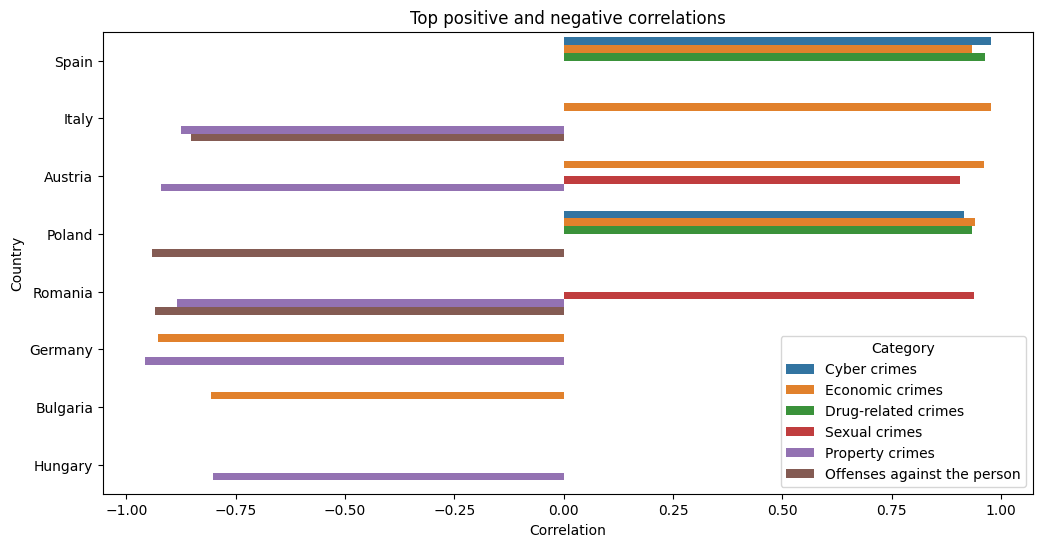

In [135]:
plot_top_correlations(df_categories, n=10)

In [137]:
plot_time_series_plotly(merged, 'Romania', 'Foreigners pop share (%)', 'Trend Crimes num & Foreigners pop share', 'Sexual crimes')


In [138]:
plot_time_series_plotly(merged, 'Poland', 'Foreigners pop share (%)', 'Trend Crimes num & Foreigners pop share')


In [144]:
plot_time_series_plotly(merged, 'Germany', 'Foreigners pop share (%)', 'Trend Crimes num & Foreigners pop share', 'Sexual crimes')
plot_time_series_plotly(merged, 'Spain', 'Foreigners pop share (%)', 'Trend Crimes num & Foreigners pop share', 'Sexual crimes')
plot_time_series_plotly(merged, 'Austria', 'Foreigners pop share (%)', 'Trend Crimes num & Foreigners pop share', 'Sexual crimes')
plot_time_series_plotly(merged, 'Austria', 'Foreigners pop share (%)', 'Trend Crimes num & Foreigners pop share', 'Sexual crimes')

In [146]:
plot_time_series_plotly(merged, 'Austria', 'Foreigners pop share (%)', 'Trend Crimes num & Foreigners pop share', 'Economic crimes')
plot_time_series_plotly(merged, 'Poland', 'Foreigners pop share (%)', 'Trend Crimes num & Foreigners pop share', 'Economic crimes')
plot_time_series_plotly(merged, 'Germany', 'Foreigners pop share (%)', 'Trend Crimes num & Foreigners pop share', 'Economic crimes')
plot_time_series_plotly(merged, 'Spain', 'Foreigners pop share (%)', 'Trend Crimes num & Foreigners pop share', 'Economic crimes')

In [148]:
plot_group_trend_plotly(merged=merged, liberal=liberal, conservs=conservs, y_label='Foreigners pop share (%)', title='Trends in Crimes and Foreigners Share by Political Group')

In [149]:
plot_group_trend_plotly(merged=merged, liberal=liberal, conservs=conservs, y_label='Foreigners pop share (%)', title='Trends in Crimes and Foreigners Share by Political Group', category='Sexual crimes')

In [150]:
plot_group_trend_plotly(merged=merged, liberal=liberal, conservs=conservs, y_label='Foreigners pop share (%)', title='Trends in Crimes and Foreigners Share by Political Group', category='Economic crimes')

#### Klasteryzacja

In [159]:
filtered = merged[~merged['geo'].isin(['Liechtenstein', 'Switzerland', 'Denmark', 'Sweden','Luxembourg'])]

features_df = filtered.groupby('geo').agg({
    'Crimes num': 'mean',
    'foreigners_pop_share': 'mean'
}).reset_index()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df[['Crimes num', 'foreigners_pop_share']])

kmeans = KMeans(n_clusters=3, random_state=0)
features_df['Cluster'] = kmeans.fit_predict(scaled_features)

fig = px.scatter(
    features_df,
    x='Crimes num',
    y='foreigners_pop_share',
    color=features_df['Cluster'].astype(str),
    hover_name='geo',
    title='K-means Clustering of Countries by Crime Rate and Foreigners Share in Population',
    labels={'Crimes num': 'Avg Crimes per 100k', 'foreigners_pop_share': 'Foreigners Share in Population'},
    width=800,
    height=600,
    text='geo'
)
fig.update_traces(textposition='top center')
fig.show()

In [161]:
filtered = merged[merged['geo'].isin(selected)]

features_df = filtered.groupby('geo').agg({
    'Crimes num': 'mean',
    'foreigners_pop_share': 'mean'
}).reset_index()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df[['Crimes num', 'foreigners_pop_share']])

kmeans = KMeans(n_clusters=2, random_state=0)
features_df['Cluster'] = kmeans.fit_predict(scaled_features)

fig = px.scatter(
    features_df,
    x='Crimes num',
    y='foreigners_pop_share',
    color=features_df['Cluster'].astype(str),
    hover_name='geo',
    title='K-means Clustering of Countries by Crime Rate and Foreigners Share in Population in Selected Countries',
    labels={'Crimes num': 'Avg Crimes per 100k', 'foreigners_pop_share': 'Foreigners Share in Population'},
    width=800,
    height=600,
    text='geo'
)
fig.update_traces(textposition='top center')
fig.show()

Widać ładny rozdział grup.